In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import datetime

In [2]:
outlets = pd.read_csv('outlets_fmd.csv')
items = pd.read_csv('items_fmd.csv')
ireplies = pd.read_csv('ireplies_fmd.csv')

C:\Users\vivia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
outlets

,newsoutlet_id,newsoutlet_name,newsoutlet_country
0,428333,"""CNN Breaking News""",USA
1,807095,"""The New York Times""",USA
2,759251,"""CNN""",USA
3,15012486,"""CBS News""",USA
4,3108351,"""The Wall Street Journal""",USA
5,5392522,"""NPR""",USA
6,2467791,"""The Washington Post""",USA
7,7309052,"""Yahoo News""",USA
8,28785486,"""ABC News""",USA
9,15754281,"""USA TODAY""",USA


### Newspaper and Country already extracted

In [4]:
outlets.rename(columns={' newsoutlet_name': 'newsoutlet_name', ' newsoutlet_country': 'newsoutlet_country'}, inplace=True)

In [5]:
m1 = pd.merge(outlets, items, on = 'newsoutlet_id', how='inner')
m = pd.merge(ireplies, m1, left_on='in_reply_to_news_id', right_on='news_id', how='inner')

In [6]:
m1['newsoutlet_country'].unique()

array([' USA', 'USA', ' UK'], dtype=object)

In [7]:
m1.replace(" USA", 
           "USA", 
           inplace=True)

In [8]:
m1['newsoutlet_country'].unique()

array(['USA', ' UK'], dtype=object)

In [9]:
m1.replace(" UK",
           "UK",
           inplace=True)

In [10]:
m1['newsoutlet_country'].unique()

array(['USA', 'UK'], dtype=object)

In [11]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23927 entries, 0 to 23926
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   newsoutlet_id       23927 non-null  int64 
 1   newsoutlet_name     23927 non-null  object
 2   newsoutlet_country  23927 non-null  object
 3   news_id             23927 non-null  int64 
 4   news_tweet_date     23927 non-null  object
 5   news_url            23927 non-null  object
 6   new_title           23927 non-null  object
 7   news_date           15624 non-null  object
 8   news_text           23927 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.8+ MB


Text(0, 0.5, 'Jornal da notícia')

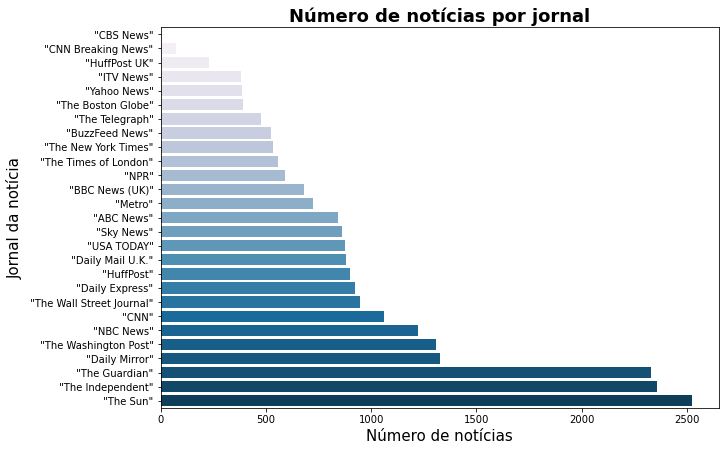

In [12]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(y='newsoutlet_name', data=m1, order=m1['newsoutlet_name'].value_counts().sort_values().index, palette='PuBu')
ax.set_title('Número de notícias por jornal',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Número de notícias', fontsize = 15)
ax.set_ylabel('Jornal da notícia', fontsize = 15)

In [13]:
a=["ABC News", "BBC News (UK)","CNN Breaking News","CNN","Daily Express", "Daily Mail U.K.","Daily Mirror","HuffPost UK",
   "HuffPost","ITV News","Metro","NBC News","NPR","Sky News", "The Boston Globe","The Guardian","The Independent", "The Sun",
   "The Telegraph", "The Times of London","The Wall Street Journal","The Washington Post","USA TODAY","Yahoo News"]
len(a)

24

In [14]:
b=m1.groupby(['newsoutlet_country'])['newsoutlet_name'].count()
b

newsoutlet_country
UK     14259
USA     9668
Name: newsoutlet_name, dtype: int64

In [15]:
len(m1['newsoutlet_name'].unique())

27

Text(0, 0.5, 'Número de notícias')

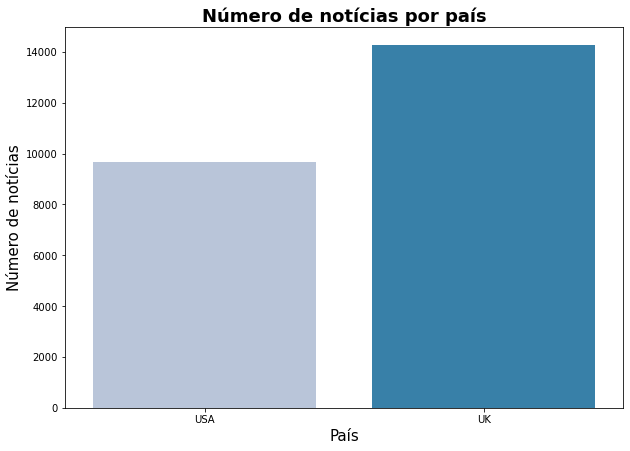

In [16]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='newsoutlet_country', data=m1, palette='PuBu')
ax.set_title('Número de notícias por país',fontsize = 18, fontweight='bold' )
ax.set_xlabel('País', fontsize = 15)
ax.set_ylabel('Número de notícias', fontsize = 15)

### We still need to extract time of publication, nº of comments and nº of comments bins

#### Time of publication

In [17]:
m1['news_tweet_date']

0        2019-01-02 07:46:28
1        2018-12-27 14:22:19
2        2019-01-01 01:17:16
3        2019-01-04 21:08:00
4        2019-01-06 05:00:20
                ...         
23922    2018-12-28 16:04:33
23923    2019-01-08 06:25:08
23924    2019-01-08 10:30:32
23925    2018-12-28 18:00:55
23926    2018-12-31 09:59:07
Name: news_tweet_date, Length: 23927, dtype: object

In [18]:
m1['news_tweet_date'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in m1['news_tweet_date']]
m1['hour'] = m1['news_tweet_date'].apply(lambda r:r.hour)
m1

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,hour
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",7
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,14
2,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,1
3,428333,"""CNN Breaking News""",USA,1081296207790538753,2019-01-04 21:08:00,https://cnn.it/2GWwzhf,Mueller grand jury gets 6 month extension,NaN,Washington (CNN) Special counsel Robert Muelle...,21
4,428333,"""CNN Breaking News""",USA,1081777463351541762,2019-01-06 05:00:20,https://cnn.it/2SFXuPM,Jazmine Barnes shooting: Police interview 'per...,NaN,(CNN) Detectives investigating the drive-by mu...,5
...,...,...,...,...,...,...,...,...,...,...
23922,16973333,"""The Independent""",UK,1078683128015794178,2018-12-28 16:04:33,https://www.indy100.com/article/home-alone-mov...,Home Alone: The famous scene from the movie Ke...,2018-12-26 10:35:23+00:00,"As Christmas is over, it's OK to start destroy...",16
23923,16973333,"""The Independent""",UK,1082523580699680768,2019-01-08 06:25:08,https://www.independent.co.uk/life-style/gadge...,Apple trolls tech industry with huge billboard...,2019-01-07 13:23:55+00:00,Apple has bought a huge billboard at the world...,6
23924,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,10
23925,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,18


In [19]:
m1['hour'].unique()

array([ 7, 14,  1, 21,  5, 16,  4, 11,  2,  3, 12, 18, 17,  0, 23, 20, 13,
       22, 15, 19,  8,  9,  6, 10], dtype=int64)

In [20]:
def time_of_day(x):
    if (x >= 8) and (x < 12):
        return 'Manhã'
    elif (x >= 12) and (x < 20):
        return 'Tarde'
    elif (x >= 20) and (x <= 23):
        return 'Noite'
    elif (x >= 0) and (x < 8):
        return 'Noite'

In [21]:
m1['time_of_day'] = m1['hour'].apply(time_of_day)
m1

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,hour,time_of_day
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",7,Noite
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,14,Tarde
2,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,1,Noite
3,428333,"""CNN Breaking News""",USA,1081296207790538753,2019-01-04 21:08:00,https://cnn.it/2GWwzhf,Mueller grand jury gets 6 month extension,NaN,Washington (CNN) Special counsel Robert Muelle...,21,Noite
4,428333,"""CNN Breaking News""",USA,1081777463351541762,2019-01-06 05:00:20,https://cnn.it/2SFXuPM,Jazmine Barnes shooting: Police interview 'per...,NaN,(CNN) Detectives investigating the drive-by mu...,5,Noite
...,...,...,...,...,...,...,...,...,...,...,...
23922,16973333,"""The Independent""",UK,1078683128015794178,2018-12-28 16:04:33,https://www.indy100.com/article/home-alone-mov...,Home Alone: The famous scene from the movie Ke...,2018-12-26 10:35:23+00:00,"As Christmas is over, it's OK to start destroy...",16,Tarde
23923,16973333,"""The Independent""",UK,1082523580699680768,2019-01-08 06:25:08,https://www.independent.co.uk/life-style/gadge...,Apple trolls tech industry with huge billboard...,2019-01-07 13:23:55+00:00,Apple has bought a huge billboard at the world...,6,Noite
23924,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,10,Manhã
23925,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,18,Tarde


In [22]:
m1.drop('hour', axis=1, inplace=True)

Text(0, 0.5, 'Número de notícias')

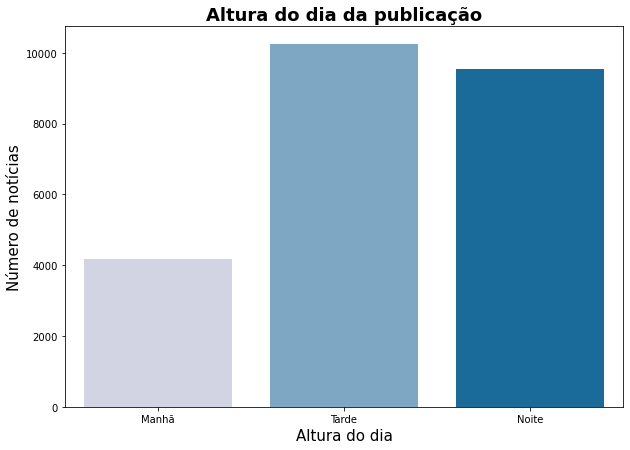

In [23]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='time_of_day', data=m1, palette='PuBu', order=['Manhã', 'Tarde', 'Noite'])
ax.set_title('Altura do dia da publicação',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Altura do dia', fontsize = 15)
ax.set_ylabel('Número de notícias', fontsize = 15)

In [24]:
m1['time_of_day'].value_counts()

Tarde    10234
Noite     9528
Manhã     4165
Name: time_of_day, dtype: int64

#### nº of comments

In [25]:
num_com = m.groupby(["news_id"])["comment_tweet_text"].count()

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(m.groupby(["news_id"])["comment_tweet_text"].count().sort_values())

news_id
1084622016836030464        1
1084105705618051072        1
1080112165170933760        1
1080112027371212800        1
1083073167684440071        1
1080110030484054021        1
1083073261859209216        1
1080109276444659712        1
1080109074870497280        1
1080112943210090496        1
1080109068629536768        1
1084105499056967682        1
1083073433494343680        1
1084446402388869123        1
1083074148165971968        1
1083074223332036610        1
1080101965512744961        1
1083074980097732609        1
1083075235627368450        1
1080108994226737152        1
1080098845911076865        1
1080114748690231302        1
1083070923144605696        1
1083063890248912897        1
1080134624540610561        1
1083064406840348673        1
1080133945272995842        1
1083066201574699008        1
1080129248915017728        1
1080129041024380928        1
1080124958980956161        1
1080116313756979200        1
1080123936694775810        1
1080122474975686656        1
108012

In [27]:
len(m.groupby(["news_id"])["comment_tweet_text"].count().sort_values())

23927

Verifiquei que dá o mesmo para 'in_reply_to_news_id', uma destas colunas pode ser removida.

In [28]:
m1['num_comments_article']= m1['news_id'].map(num_com)

In [29]:
m1

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Noite,87
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Tarde,44
2,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Noite,48
3,428333,"""CNN Breaking News""",USA,1081296207790538753,2019-01-04 21:08:00,https://cnn.it/2GWwzhf,Mueller grand jury gets 6 month extension,NaN,Washington (CNN) Special counsel Robert Muelle...,Noite,190
4,428333,"""CNN Breaking News""",USA,1081777463351541762,2019-01-06 05:00:20,https://cnn.it/2SFXuPM,Jazmine Barnes shooting: Police interview 'per...,NaN,(CNN) Detectives investigating the drive-by mu...,Noite,128
...,...,...,...,...,...,...,...,...,...,...,...
23922,16973333,"""The Independent""",UK,1078683128015794178,2018-12-28 16:04:33,https://www.indy100.com/article/home-alone-mov...,Home Alone: The famous scene from the movie Ke...,2018-12-26 10:35:23+00:00,"As Christmas is over, it's OK to start destroy...",Tarde,1
23923,16973333,"""The Independent""",UK,1082523580699680768,2019-01-08 06:25:08,https://www.independent.co.uk/life-style/gadge...,Apple trolls tech industry with huge billboard...,2019-01-07 13:23:55+00:00,Apple has bought a huge billboard at the world...,Noite,1
23924,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,Manhã,28
23925,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Tarde,7


In [30]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23927 entries, 0 to 23926
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   newsoutlet_id         23927 non-null  int64         
 1   newsoutlet_name       23927 non-null  object        
 2   newsoutlet_country    23927 non-null  object        
 3   news_id               23927 non-null  int64         
 4   news_tweet_date       23927 non-null  datetime64[ns]
 5   news_url              23927 non-null  object        
 6   new_title             23927 non-null  object        
 7   news_date             15624 non-null  object        
 8   news_text             23927 non-null  object        
 9   time_of_day           23927 non-null  object        
 10  num_comments_article  23927 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 2.8+ MB


#### nº of comments bins

In [31]:
m1['num_comments_article'].describe()

count    23927.000000
mean        41.320558
std        233.664474
min          1.000000
25%          2.000000
50%          7.000000
75%         22.000000
max      21970.000000
Name: num_comments_article, dtype: float64

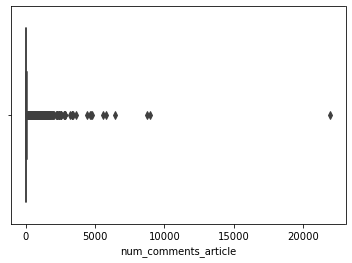

In [32]:
sns.boxplot(m1['num_comments_article'])

In [33]:
# calculate summary statistics
data_mean, data_std = m1['num_comments_article'].mean(), m1['num_comments_article'].std()
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [34]:
lower, upper

(-659.6728641392542, 742.3139808693081)

In [35]:
outliers = [x for x in m1['num_comments_article'] if x < lower or x > upper]
outliers

[1037,
 982,
 1216,
 1567,
 1448,
 1218,
 1375,
 1054,
 1940,
 868,
 3360,
 1968,
 1480,
 1522,
 1523,
 5794,
 952,
 2361,
 3148,
 799,
 930,
 1280,
 1833,
 1489,
 1637,
 2379,
 2264,
 877,
 1786,
 4404,
 2165,
 1590,
 1353,
 1118,
 1157,
 819,
 747,
 783,
 2769,
 765,
 783,
 1125,
 1060,
 1674,
 987,
 1486,
 809,
 886,
 909,
 810,
 1134,
 2225,
 1156,
 1039,
 903,
 4616,
 1327,
 1065,
 1992,
 1623,
 1109,
 825,
 765,
 1036,
 2280,
 1308,
 2524,
 952,
 753,
 874,
 1276,
 785,
 913,
 954,
 1091,
 925,
 1020,
 1052,
 928,
 876,
 1064,
 1479,
 1751,
 1670,
 899,
 1625,
 3307,
 1889,
 1262,
 1361,
 1332,
 784,
 4674,
 899,
 1751,
 2322,
 969,
 1573,
 1645,
 1052,
 1545,
 1009,
 749,
 956,
 2261,
 1445,
 3625,
 1209,
 2545,
 1040,
 2823,
 1256,
 2408,
 1660,
 1904,
 1060,
 1675,
 1316,
 906,
 2496,
 3364,
 881,
 8767,
 822,
 837,
 1229,
 1037,
 2794,
 1211,
 6419,
 1000,
 1097,
 1033,
 1079,
 2750,
 748,
 1548,
 977,
 1144,
 1515,
 933,
 827,
 1451,
 900,
 3320,
 21970,
 5585,
 1021,
 890,


In [36]:
len(outliers)

173

4774 com 1 comentário,
13462 com 5 ou menos comentários,
17467 com 10 ou menos comentários,
20967 com 20 ou menos comentários,
1894 com mais de 100 comentários

##### Retirar noticias com 5 comentário ou menos

In [37]:
finali = m1.loc[m1['num_comments_article'] > 5].copy()
finali

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Noite,87
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Tarde,44
2,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Noite,48
3,428333,"""CNN Breaking News""",USA,1081296207790538753,2019-01-04 21:08:00,https://cnn.it/2GWwzhf,Mueller grand jury gets 6 month extension,NaN,Washington (CNN) Special counsel Robert Muelle...,Noite,190
4,428333,"""CNN Breaking News""",USA,1081777463351541762,2019-01-06 05:00:20,https://cnn.it/2SFXuPM,Jazmine Barnes shooting: Police interview 'per...,NaN,(CNN) Detectives investigating the drive-by mu...,Noite,128
...,...,...,...,...,...,...,...,...,...,...,...
23904,16973333,"""The Independent""",UK,1084477695982030848,2019-01-13 15:50:06,https://www.independent.co.uk/news/world/europ...,Paris explosion: Body found in rubble of baker...,2019-01-13 15:04:45+00:00,Rescue workers have discovered a body in the r...,Tarde,14
23919,16973333,"""The Independent""",UK,1080878204620021760,2019-01-03 17:27:00,https://www.independent.co.uk/travel/news-and-...,China to launch self-driving bullet trains tha...,2019-01-03 16:55:15+00:00,China will introduce the world’s first driverl...,Tarde,6
23924,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,Manhã,28
23925,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Tarde,7


28299 notícias para 14682 notícias

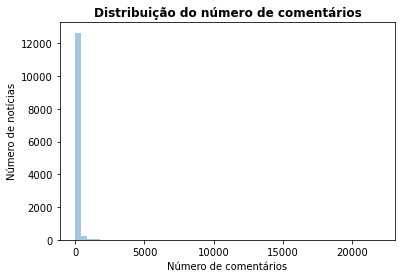

In [38]:
ax=sns.distplot(finali["num_comments_article"], hist=True, kde=False, bins = 50)
ax.set_title('Distribuição do número de comentários',fontsize = 12, fontweight='bold' )
ax.set_xlabel('Número de comentários', fontsize = 10)
ax.set_ylabel('Número de notícias', fontsize = 10)
plt.show()

In [39]:
finali['num_comments_article'].describe()

count    13011.000000
mean        73.933210
std        313.172922
min          6.000000
25%         10.000000
50%         20.000000
75%         50.000000
max      21970.000000
Name: num_comments_article, dtype: float64

In [40]:
finali['num_comments_article_log'] = finali['num_comments_article'].apply(np.log)
#finali['num_comments_article'].apply(np.log)

In [41]:
finali

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article,num_comments_article_log
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Noite,87,4.465908
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Tarde,44,3.784190
2,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Noite,48,3.871201
3,428333,"""CNN Breaking News""",USA,1081296207790538753,2019-01-04 21:08:00,https://cnn.it/2GWwzhf,Mueller grand jury gets 6 month extension,NaN,Washington (CNN) Special counsel Robert Muelle...,Noite,190,5.247024
4,428333,"""CNN Breaking News""",USA,1081777463351541762,2019-01-06 05:00:20,https://cnn.it/2SFXuPM,Jazmine Barnes shooting: Police interview 'per...,NaN,(CNN) Detectives investigating the drive-by mu...,Noite,128,4.852030
...,...,...,...,...,...,...,...,...,...,...,...,...
23904,16973333,"""The Independent""",UK,1084477695982030848,2019-01-13 15:50:06,https://www.independent.co.uk/news/world/europ...,Paris explosion: Body found in rubble of baker...,2019-01-13 15:04:45+00:00,Rescue workers have discovered a body in the r...,Tarde,14,2.639057
23919,16973333,"""The Independent""",UK,1080878204620021760,2019-01-03 17:27:00,https://www.independent.co.uk/travel/news-and-...,China to launch self-driving bullet trains tha...,2019-01-03 16:55:15+00:00,China will introduce the world’s first driverl...,Tarde,6,1.791759
23924,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,Manhã,28,3.332205
23925,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Tarde,7,1.945910


In [42]:
pd.qcut(finali['num_comments_article'], q=5)

0        (66.0, 21970.0]
1           (27.0, 66.0]
2           (27.0, 66.0]
3        (66.0, 21970.0]
4        (66.0, 21970.0]
              ...       
23904        (9.0, 15.0]
23919       (5.999, 9.0]
23924       (27.0, 66.0]
23925       (5.999, 9.0]
23926       (5.999, 9.0]
Name: num_comments_article, Length: 13011, dtype: category
Categories (5, interval[float64]): [(5.999, 9.0] < (9.0, 15.0] < (15.0, 27.0] < (27.0, 66.0] < (66.0, 21970.0]]

In [43]:
pd.qcut(finali['num_comments_article'], q=5)

0        (66.0, 21970.0]
1           (27.0, 66.0]
2           (27.0, 66.0]
3        (66.0, 21970.0]
4        (66.0, 21970.0]
              ...       
23904        (9.0, 15.0]
23919       (5.999, 9.0]
23924       (27.0, 66.0]
23925       (5.999, 9.0]
23926       (5.999, 9.0]
Name: num_comments_article, Length: 13011, dtype: category
Categories (5, interval[float64]): [(5.999, 9.0] < (9.0, 15.0] < (15.0, 27.0] < (27.0, 66.0] < (66.0, 21970.0]]

In [44]:
finali['bins_num_comm'] = pd.qcut(finali['num_comments_article'], q=5)

In [45]:
finali['bins_num_comm'] = finali['bins_num_comm'].astype("str")

In [46]:
finali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011 entries, 0 to 23926
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   newsoutlet_id             13011 non-null  int64         
 1   newsoutlet_name           13011 non-null  object        
 2   newsoutlet_country        13011 non-null  object        
 3   news_id                   13011 non-null  int64         
 4   news_tweet_date           13011 non-null  datetime64[ns]
 5   news_url                  13011 non-null  object        
 6   new_title                 13011 non-null  object        
 7   news_date                 6376 non-null   object        
 8   news_text                 13011 non-null  object        
 9   time_of_day               13011 non-null  object        
 10  num_comments_article      13011 non-null  int64         
 11  num_comments_article_log  13011 non-null  float64       
 12  bins_num_comm     

In [47]:
dict={'(5.999, 9.0]':1, '(9.0, 15.0]':2, '(15.0, 27.0]':3, '(27.0, 66.0]':4, '(66.0, 21970.0]':5}

In [48]:
finali.replace({'bins_num_comm': dict}, inplace=True)

In [49]:
finali

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article,num_comments_article_log,bins_num_comm
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Noite,87,4.465908,5
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Tarde,44,3.784190,4
2,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Noite,48,3.871201,4
3,428333,"""CNN Breaking News""",USA,1081296207790538753,2019-01-04 21:08:00,https://cnn.it/2GWwzhf,Mueller grand jury gets 6 month extension,NaN,Washington (CNN) Special counsel Robert Muelle...,Noite,190,5.247024,5
4,428333,"""CNN Breaking News""",USA,1081777463351541762,2019-01-06 05:00:20,https://cnn.it/2SFXuPM,Jazmine Barnes shooting: Police interview 'per...,NaN,(CNN) Detectives investigating the drive-by mu...,Noite,128,4.852030,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23904,16973333,"""The Independent""",UK,1084477695982030848,2019-01-13 15:50:06,https://www.independent.co.uk/news/world/europ...,Paris explosion: Body found in rubble of baker...,2019-01-13 15:04:45+00:00,Rescue workers have discovered a body in the r...,Tarde,14,2.639057,2
23919,16973333,"""The Independent""",UK,1080878204620021760,2019-01-03 17:27:00,https://www.independent.co.uk/travel/news-and-...,China to launch self-driving bullet trains tha...,2019-01-03 16:55:15+00:00,China will introduce the world’s first driverl...,Tarde,6,1.791759,1
23924,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,Manhã,28,3.332205,4
23925,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Tarde,7,1.945910,1


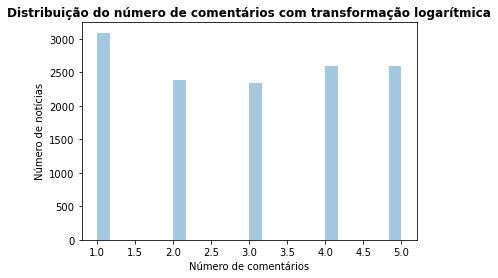

In [50]:
ax=sns.distplot(finali["bins_num_comm"], hist=True, kde=False)
ax.set_title('Distribuição do número de comentários com transformação logarítmica',fontsize = 12, fontweight='bold' )
ax.set_xlabel('Número de comentários', fontsize = 10)
ax.set_ylabel('Número de notícias', fontsize = 10)
plt.show()

In [51]:
dict_time_day = {'Morning':1, 'Afternoon':2, 'Night':3}
finali.replace({'time_of_day': dict_time_day}, inplace=True)

In [52]:
finali

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article,num_comments_article_log,bins_num_comm
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Noite,87,4.465908,5
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Tarde,44,3.784190,4
2,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Noite,48,3.871201,4
3,428333,"""CNN Breaking News""",USA,1081296207790538753,2019-01-04 21:08:00,https://cnn.it/2GWwzhf,Mueller grand jury gets 6 month extension,NaN,Washington (CNN) Special counsel Robert Muelle...,Noite,190,5.247024,5
4,428333,"""CNN Breaking News""",USA,1081777463351541762,2019-01-06 05:00:20,https://cnn.it/2SFXuPM,Jazmine Barnes shooting: Police interview 'per...,NaN,(CNN) Detectives investigating the drive-by mu...,Noite,128,4.852030,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23904,16973333,"""The Independent""",UK,1084477695982030848,2019-01-13 15:50:06,https://www.independent.co.uk/news/world/europ...,Paris explosion: Body found in rubble of baker...,2019-01-13 15:04:45+00:00,Rescue workers have discovered a body in the r...,Tarde,14,2.639057,2
23919,16973333,"""The Independent""",UK,1080878204620021760,2019-01-03 17:27:00,https://www.independent.co.uk/travel/news-and-...,China to launch self-driving bullet trains tha...,2019-01-03 16:55:15+00:00,China will introduce the world’s first driverl...,Tarde,6,1.791759,1
23924,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,Manhã,28,3.332205,4
23925,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Tarde,7,1.945910,1


In [53]:
test=finali[['newsoutlet_name', 'newsoutlet_country', 'news_id', 'time_of_day', 'num_comments_article_log', 'bins_num_comm']].copy()
test

,newsoutlet_name,newsoutlet_country,news_id,time_of_day,num_comments_article_log,bins_num_comm
0,"""CNN Breaking News""",USA,1080369723227979776,Noite,4.465908,5
1,"""CNN Breaking News""",USA,1078295012532736001,Tarde,3.784190,4
2,"""CNN Breaking News""",USA,1079909388524154880,Noite,3.871201,4
3,"""CNN Breaking News""",USA,1081296207790538753,Noite,5.247024,5
4,"""CNN Breaking News""",USA,1081777463351541762,Noite,4.852030,5
...,...,...,...,...,...,...
23904,"""The Independent""",UK,1084477695982030848,Tarde,2.639057,2
23919,"""The Independent""",UK,1080878204620021760,Tarde,1.791759,1
23924,"""The Independent""",UK,1082585338898513921,Manhã,3.332205,4
23925,"""The Independent""",UK,1078712411539034112,Tarde,1.945910,1


In [54]:
test = pd.get_dummies(test, columns=["newsoutlet_country"])

In [55]:
test = pd.get_dummies(test, columns=["newsoutlet_name"])

In [56]:
test

,news_id,time_of_day,num_comments_article_log,bins_num_comm,newsoutlet_country_UK,newsoutlet_country_USA,"newsoutlet_name_ ""ABC News""","newsoutlet_name_ ""BBC News (UK)""","newsoutlet_name_ ""BuzzFeed News""","newsoutlet_name_ ""CBS News""","newsoutlet_name_ ""CNN Breaking News""","newsoutlet_name_ ""CNN""","newsoutlet_name_ ""Daily Express""","newsoutlet_name_ ""Daily Mail U.K.""","newsoutlet_name_ ""Daily Mirror""","newsoutlet_name_ ""HuffPost UK""","newsoutlet_name_ ""HuffPost""","newsoutlet_name_ ""ITV News""","newsoutlet_name_ ""Metro""","newsoutlet_name_ ""NBC News""","newsoutlet_name_ ""NPR""","newsoutlet_name_ ""Sky News""","newsoutlet_name_ ""The Boston Globe""","newsoutlet_name_ ""The Guardian""","newsoutlet_name_ ""The Independent""","newsoutlet_name_ ""The New York Times""","newsoutlet_name_ ""The Sun""","newsoutlet_name_ ""The Telegraph""","newsoutlet_name_ ""The Times of London""","newsoutlet_name_ ""The Wall Street Journal""","newsoutlet_name_ ""The Washington Post""","newsoutlet_name_ ""USA TODAY""","newsoutlet_name_ ""Yahoo News"""
0,1080369723227979776,Noite,4.465908,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1078295012532736001,Tarde,3.784190,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1079909388524154880,Noite,3.871201,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1081296207790538753,Noite,5.247024,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1081777463351541762,Noite,4.852030,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23904,1084477695982030848,Tarde,2.639057,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
23919,1080878204620021760,Tarde,1.791759,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
23924,1082585338898513921,Manhã,3.332205,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
23925,1078712411539034112,Tarde,1.945910,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
# export do csv
#test.to_csv('metadata.csv', index=False)

### PIPELINE

In [345]:
teste_1 = pd.merge(outlets, items, on = 'newsoutlet_id', how='inner')
teste_1_completo = pd.merge(ireplies, m1, left_on='in_reply_to_news_id', right_on='news_id', how='inner')

In [346]:
def addhour(d_f):
    d_f['news_tweet_date'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in d_f['news_tweet_date']]
    d_f['time_of_day'] = d_f['news_tweet_date'].apply(lambda r:r.hour)
    return d_f

In [347]:
def time_of_day(d_f):
    for x in d_f['time_of_day']:
        if (x >= 8) and (x < 12):
            d_f['time_of_day'].replace(x, 1, inplace=True)
        elif (x >= 12) and (x < 20):
            d_f['time_of_day'].replace(x, 2, inplace=True)
        elif (x >= 20) and (x <= 23):
            d_f['time_of_day'].replace(x, 3, inplace=True)
        elif (x >= 0) and (x < 8):
            d_f['time_of_day'].replace(x, 3, inplace=True)
    return d_f

In [348]:
def num_comments(d_f):
    num_com = teste_1_completo.groupby(["news_id"])["comment_tweet_text"].count()
    d_f['num_comments_article']= d_f['news_id'].map(num_com)
    d_f['num_comments_article_log'] = d_f['num_comments_article'].apply(np.log)
    return d_f

In [349]:
def num_comm_bins(d_f):
    a = list(pd.qcut(d_f['num_comments_article'], q=5).unique())
    dict={a[0]: 1, a[1]:2, a[2]:3, a[3]:4, a[4]:5}
    d_f['bins_num_comm'] = pd.qcut(d_f['num_comments_article'], q=5)
    d_f.replace({'bins_num_comm': dict}, inplace=True)
    
    return d_f

In [350]:
def ohe_newscountry(d_f):
    name=list(d_f['newsoutlet_country'].unique())
    names=pd.Series(name)
    bla=(d_f['newsoutlet_country']).copy()
    name_=pd.get_dummies(bla.append(names,ignore_index=True), prefix='country_')

    return pd.merge(d_f,name_[0:-len(name)],left_index=True, right_index=True)

In [351]:
def ohe_newsname(d_f):
    name=list(d_f['newsoutlet_name'].unique())
    names=pd.Series(name)
    bla=(d_f['newsoutlet_name']).copy()
    name_=pd.get_dummies(bla.append(names,ignore_index=True), prefix='name_')
    
    return pd.merge(d_f,name_[0:-len(name)],left_index=True, right_index=True)

In [352]:
def dropit(d_f):
    return d_f.drop(columns=['news_url', 'news_date', 'newsoutlet_id', 'news_tweet_date','news_url','new_title',
                             'news_text','newsoutlet_name','newsoutlet_country'])

In [353]:
# Create a pipeline that applies both the functions created above
pipeline = teste_1.pipe(addhour).pipe(time_of_day).pipe(num_comments).pipe(num_comm_bins).pipe(ohe_newsname).pipe(ohe_newscountry)
  
# calling pipeline
pipeline

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article,num_comments_article_log,bins_num_comm,"name__ ""ABC News""","name__ ""BBC News (UK)""","name__ ""BuzzFeed News""","name__ ""CBS News""","name__ ""CNN Breaking News""","name__ ""CNN""","name__ ""Daily Express""","name__ ""Daily Mail U.K.""","name__ ""Daily Mirror""","name__ ""HuffPost UK""","name__ ""HuffPost""","name__ ""ITV News""","name__ ""Metro""","name__ ""NBC News""","name__ ""NPR""","name__ ""Sky News""","name__ ""The Boston Globe""","name__ ""The Guardian""","name__ ""The Independent""","name__ ""The New York Times""","name__ ""The Sun""","name__ ""The Telegraph""","name__ ""The Times of London""","name__ ""The Wall Street Journal""","name__ ""The Washington Post""","name__ ""USA TODAY""","name__ ""Yahoo News""",country__ UK,country__ USA,country__USA
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",3,87,4.465908,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,3,44,3.784190,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,3,48,3.871201,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,428333,"""CNN Breaking News""",USA,1081296207790538753,2019-01-04 21:08:00,https://cnn.it/2GWwzhf,Mueller grand jury gets 6 month extension,NaN,Washington (CNN) Special counsel Robert Muelle...,3,190,5.247024,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,428333,"""CNN Breaking News""",USA,1081777463351541762,2019-01-06 05:00:20,https://cnn.it/2SFXuPM,Jazmine Barnes shooting: Police interview 'per...,NaN,(CNN) Detectives investigating the drive-by mu...,3,128,4.852030,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,16973333,"""The Independent""",UK,1078683128015794178,2018-12-28 16:04:33,https://www.indy100.com/article/home-alone-mov...,Home Alone: The famous scene from the movie Ke...,2018-12-26 10:35:23+00:00,"As Christmas is over, it's OK to start destroy...",3,1,0.000000,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
23923,16973333,"""The Independent""",UK,1082523580699680768,2019-01-08 06:25:08,https://www.independent.co.uk/life-style/gadge...,Apple trolls tech industry with huge billboard...,2019-01-07 13:23:55+00:00,Apple has bought a huge billboard at the world...,3,1,0.000000,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
23924,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,3,28,3.332205,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
23925,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,3,7,1.945910,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
